# Workshop 2: Image Segmentation

In this workshop we will how to implement a segmentation model based in UNet and ResNet with [fastai](https://https://www.fast.ai/). The structure of the workshop will be as follows:


1.   Load and explore data
2.   Train the model
3.   Evaluate results

[Reference](https://https://course.fast.ai/videos/?lesson=3)



# Don't forget to configure the execution environment to run in GPU

# Download dataset

In [ ]:
# Import fastai
from fastai.vision.all import *

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download dataset
path = untar_data(URLs.CAMVID)

In [ ]:
path

Path('/root/.fastai/data/camvid')

In [ ]:
path.ls()

(#4) [Path('/root/.fastai/data/camvid/labels'),Path('/root/.fastai/data/camvid/valid.txt'),Path('/root/.fastai/data/camvid/images'),Path('/root/.fastai/data/camvid/codes.txt')]

In [ ]:
(path / "images").ls()

(#702) [Path('/root/.fastai/data/camvid/images/Seq05VD_f04680.png'),Path('/root/.fastai/data/camvid/images/Seq05VD_f04920.png'),Path('/root/.fastai/data/camvid/images/0006R0_f03240.png'),Path('/root/.fastai/data/camvid/images/0016E5_01440.png'),Path('/root/.fastai/data/camvid/images/0016E5_07230.png'),Path('/root/.fastai/data/camvid/images/0016E5_00390.png'),Path('/root/.fastai/data/camvid/images/Seq05VD_f00690.png'),Path('/root/.fastai/data/camvid/images/0006R0_f00990.png'),Path('/root/.fastai/data/camvid/images/0016E5_08021.png'),Path('/root/.fastai/data/camvid/images/0016E5_08095.png')...]

In [ ]:
# Number of images
len((path / "images").ls())

702

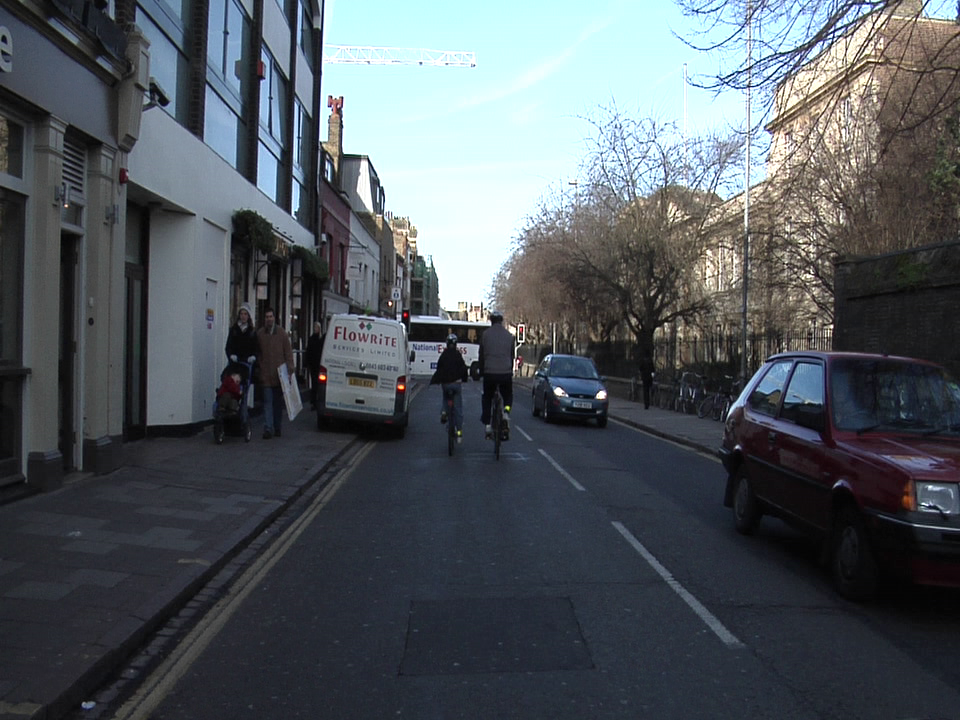

(720, 960)


In [ ]:
# Show image and size
img_name = "0016E5_07770.png"
img = load_image(path / "images" / img_name)
img.show()
print(img.shape)

In [ ]:
(path / "labels").ls()

(#701) [Path('/root/.fastai/data/camvid/labels/0016E5_08550_P.png'),Path('/root/.fastai/data/camvid/labels/0006R0_f02070_P.png'),Path('/root/.fastai/data/camvid/labels/0016E5_00840_P.png'),Path('/root/.fastai/data/camvid/labels/0016E5_05490_P.png'),Path('/root/.fastai/data/camvid/labels/0016E5_08047_P.png'),Path('/root/.fastai/data/camvid/labels/Seq05VD_f04110_P.png'),Path('/root/.fastai/data/camvid/labels/0001TP_009780_P.png'),Path('/root/.fastai/data/camvid/labels/0016E5_05280_P.png'),Path('/root/.fastai/data/camvid/labels/0006R0_f01200_P.png'),Path('/root/.fastai/data/camvid/labels/0001TP_006810_P.png')...]

In [ ]:
# Number of masks
len((path / "labels").ls())

701

(720, 960)


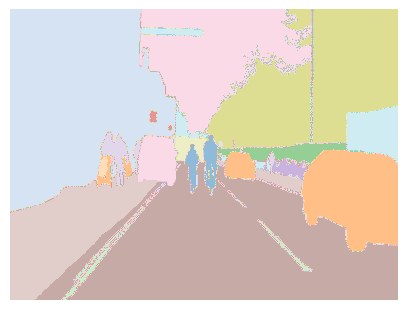

In [ ]:
# Show mask and size
mask_name = img_name.split(".")[0] + "_P.png"
mask = PILMask.create(path / "labels" / mask_name)
mask.show()
print(mask.shape)

In [ ]:
# Show different values of mask
np.unique(np.array(mask))

array([ 2,  4,  5,  6,  7,  8,  9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26,
       27, 30, 31], dtype=uint8)

In [ ]:
# Show label names
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [ ]:
# Show number of classes
len(codes)

32

# 1. Load and explore data

In [ ]:
# Function to get mask path from images path
def img_to_mask(img_path):
  mask_dir = path / "labels"
  mask_name = img_path.name.split(".")[0] + "_P.png"
  mask_path = mask_dir / mask_name
  return mask_path

In [ ]:
# Configure data source
dls = SegmentationDataLoaders.from_label_func(path, bs=8,
      fnames = get_image_files(path/"images"), 
      label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',                                     
      codes = codes,                         
      batch_tfms=[*aug_transforms(size=(180,240)), Normalize.from_stats(*imagenet_stats)])

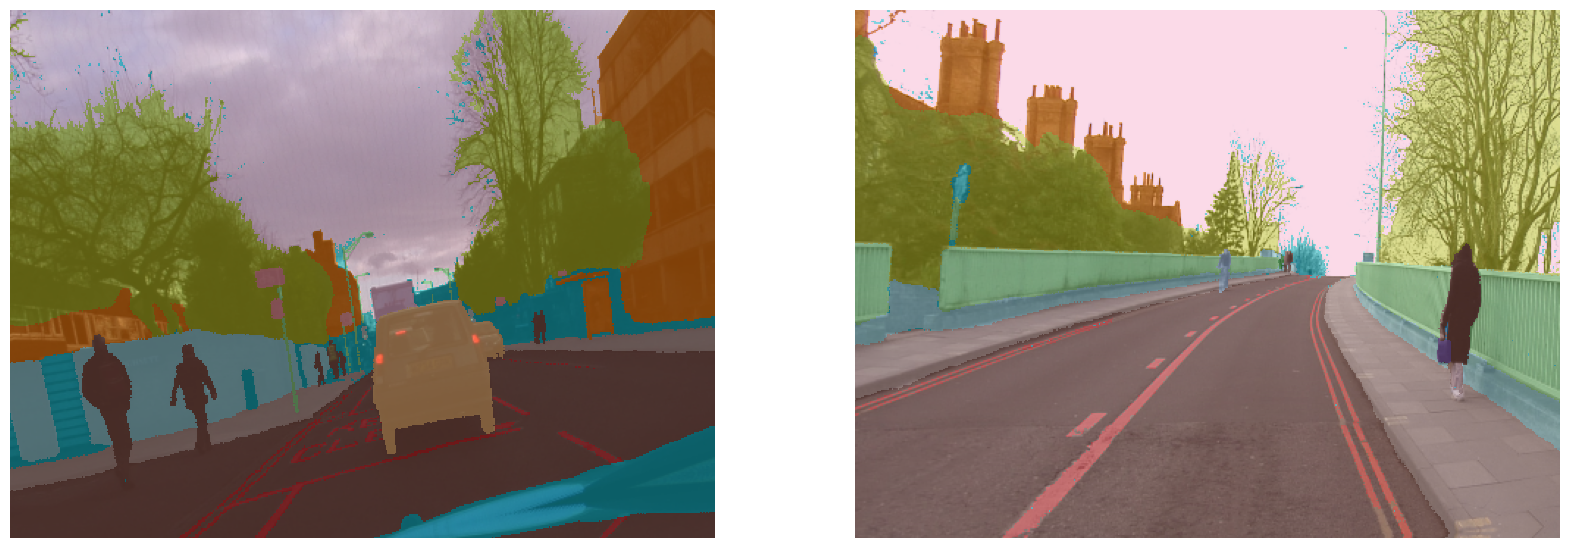

In [ ]:
dls.show_batch(max_n=2, figsize=(20, 7))

# 2. Train the model

In [ ]:
# Metric for camvid dataset
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [ ]:
# Initialize learner
metrics=acc_camvid
learn = unet_learner(dls, models.resnet18, metrics=metrics)

AttributeError: ignored

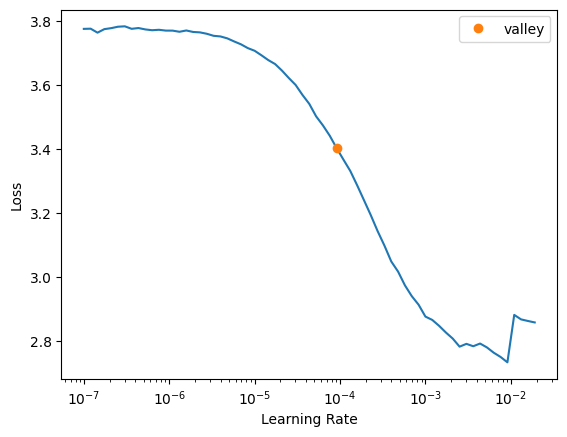

In [ ]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 5e-4

In [ ]:
# Train 10 epochs
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,acc_camvid,time
0,1.602130,0.879842,0.810753,01:26
1,0.984876,0.683580,0.846610,01:24
2,0.733612,0.563652,0.860525,01:25


In [ ]:
# Save the model
learn.save("score-8553")

In [ ]:
# Unfreeze all the network
learn.unfreeze()

In [ ]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 1e-4

In [ ]:
# Train 10 epochs
learn.fit_one_cycle(10, slice(lr/100, lr))

In [ ]:
learn.save('score-8739')

# 3. Evaluate results

In [ ]:
# Show validation predictions
learn.show_results(rows=3, figsize=(8,9))

# Exercise 1: Re-train the model with orig_size // 2

In [ ]:
# Configure data processing


In [ ]:
# Configure learner with new data and freeze conv layers


In [ ]:
# Load model


In [ ]:
# Find learning rate


In [ ]:
# Set learning rate


In [ ]:
# Train 10 epochs


In [ ]:
# Unfreeze all the network


In [ ]:
# Find learning rate


In [ ]:
# Set learning rate


In [ ]:
# Train 10 epochs


In [ ]:
# Save the model


In [ ]:
# Show validation predictions


# Exercise 2: Train a model based in ResNet34